In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

In [53]:
## Dados
apes = pd.read_csv('apes-aluguel.csv')

X_original = np.array(apes.tamanho)
y_original = np.array(apes.preco)

In [54]:
## Normalizando os dados
### Função para pegar o maior e o menor
def pegar_min_max(linha):
    maior = max(linha)
    menor = min(linha)
    
    return menor, maior

def normalizar(menor, maior, dados):
    dados_normalizados = []
    for dado in dados:
        dados_normalizados.append((dado - menor) / (maior - menor))
    return dados_normalizados

In [55]:
minX, maxX = pegar_min_max(X_original)
minY, maxY = pegar_min_max(y_original)

X = normalizar(minX, maxX, X_original)
y = normalizar(minY, maxY, y_original)

In [56]:
X

[0.6216216216216216,
 0.10270270270270271,
 1.0,
 1.0,
 0.2864864864864865,
 0.21621621621621623,
 0.24324324324324326,
 0.016216216216216217,
 0.08108108108108109,
 0.08108108108108109,
 0.1891891891891892,
 0.6054054054054054,
 0.1891891891891892,
 0.2594594594594595,
 0.32972972972972975,
 0.35135135135135137,
 0.2594594594594595,
 0.3675675675675676,
 0.4,
 0.6216216216216216,
 0.2648648648648649,
 0.17297297297297298,
 0.4,
 0.3081081081081081,
 0.016216216216216217,
 0.32972972972972975,
 0.2594594594594595,
 0.032432432432432434,
 0.5027027027027027,
 0.2702702702702703,
 0.13513513513513514,
 0.25405405405405407,
 0.40540540540540543,
 0.6216216216216216,
 0.2594594594594595,
 0.2594594594594595,
 0.32972972972972975,
 0.5405405405405406,
 0.24324324324324326,
 1.0,
 0.016216216216216217,
 0.24324324324324326,
 0.14594594594594595,
 0.14594594594594595,
 0.4594594594594595,
 0.2702702702702703,
 0.2702702702702703,
 0.7621621621621621,
 0.32972972972972975,
 0.14594594594594595

In [57]:
y

[0.6296296296296297,
 0.18518518518518517,
 0.4444444444444444,
 0.4444444444444444,
 0.22839506172839505,
 0.07407407407407407,
 0.32098765432098764,
 0.09259259259259259,
 0.09259259259259259,
 0.19753086419753085,
 0.0,
 0.4444444444444444,
 0.12345679012345678,
 1.0,
 0.5679012345679012,
 0.29012345679012347,
 1.0,
 0.16666666666666666,
 0.29012345679012347,
 0.5061728395061729,
 0.38271604938271603,
 0.6172839506172839,
 0.13580246913580246,
 0.25925925925925924,
 0.09259259259259259,
 0.5679012345679012,
 1.0,
 0.09259259259259259,
 0.32098765432098764,
 0.16666666666666666,
 0.19753086419753085,
 0.29012345679012347,
 0.19753086419753085,
 0.6296296296296297,
 1.0,
 1.0,
 0.5679012345679012,
 0.13580246913580246,
 0.38271604938271603,
 0.4444444444444444,
 0.09259259259259259,
 0.19753086419753085,
 0.10493827160493827,
 0.10493827160493827,
 0.32098765432098764,
 0.16666666666666666,
 0.16666666666666666,
 0.4444444444444444,
 0.5679012345679012,
 0.10493827160493827,
 0.308641

In [58]:
## TAXA DE APRENDIZADO ( velocidade de descida )
alpha = 0.01

In [59]:
## VALORES INICIAIS PARA W0 e W1
w0 = 0.1
w1 = 0.1

In [60]:
## Definindo hipótese
def hip(x, w0, w1):
    return w0 + w1*x

In [61]:
## Realizando uma predição com o custo alto
hip(1.5, w0, w1)

0.25

In [62]:
## Função para plotar pontos e regressão
def plot_line(X, y, w0, w1):
    x_values = [i for i in range(int(min(X))-1, int(max(X))+2)]
    y_values = [hip(x, w0, w1) for x in x_values]
    plt.xlabel("Tamanho(m2)")
    plt.ylabel("Preço")
    plt.plot(x_values, y_values, 'r')
    plt.plot(X, y, 'bo')

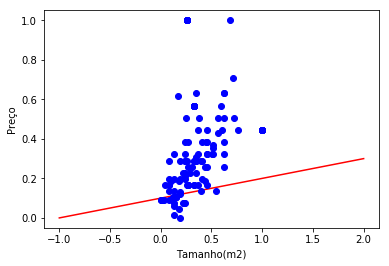

In [63]:
plot_line(X, y, w0, w1)

In [64]:
## Função MSE(Média do erro ao quadrado)
def MSE(X, y, w0, w1):
    custo = 0
    m = float(len(X))

    for i in range(0, len(X)):
        custo += (hip(X[i], w0, w1) - y[i]) ** 2

    return custo / m

In [65]:
MSE(X, y, w0, w1)

0.09394721865256363

In [66]:
epoch = 800

In [67]:
## Gradiente Descendente
### STEP
def gradient_descent_step(w0, w1, X, y, alpha):
    erro_w0 = 0
    erro_w1 = 0
    m = float(len(X))

    for i in range(0, len(X)):
        erro_w0 += hip(float(X[i]), w0, w1) - float(y[i])
        erro_w1 += (hip(float(X[i]), w0, w1) - float(y[i])) * X[i]

    novo_w0 = w0 - alpha * (1 / m) * erro_w0
    novo_w1 = w1 - alpha * (1 / m) * erro_w1
    
    return novo_w0, novo_w1

In [68]:
### LOOP
def gradient_descent(w0, w1, X, y, alpha, epoch):
    custo = np.zeros(epoch)

    for i in range(epoch):
        w0, w1 = gradient_descent_step(w0, w1, X, y, alpha)
        custo[i] = MSE(X, y, w0, w1)

    return w0, w1, custo

In [69]:
w0 , w1 , custo = gradient_descent(w0, w1, X, y, alpha, epoch)

In [70]:
custo

array([0.09299435, 0.09206281, 0.09115211, 0.09026179, 0.08939138,
       0.08854045, 0.08770855, 0.08689527, 0.08610017, 0.08532286,
       0.08456293, 0.08382   , 0.08309368, 0.0823836 , 0.0816894 ,
       0.08101072, 0.08034721, 0.07969854, 0.07906436, 0.07844436,
       0.07783822, 0.07724562, 0.07666627, 0.07609986, 0.0755461 ,
       0.07500472, 0.07447543, 0.07395796, 0.07345205, 0.07295744,
       0.07247387, 0.0720011 , 0.07153889, 0.07108699, 0.07064518,
       0.07021323, 0.06979093, 0.06937804, 0.06897437, 0.0685797 ,
       0.06819384, 0.06781658, 0.06744774, 0.06708712, 0.06673454,
       0.06638982, 0.06605278, 0.06572326, 0.06540108, 0.06508608,
       0.06477809, 0.06447697, 0.06418255, 0.06389469, 0.06361323,
       0.06333804, 0.06306898, 0.0628059 , 0.06254868, 0.06229717,
       0.06205127, 0.06181083, 0.06157573, 0.06134586, 0.0611211 ,
       0.06090133, 0.06068645, 0.06047634, 0.06027089, 0.06007001,
       0.05987358, 0.05968151, 0.0594937 , 0.05931006, 0.05913

In [71]:
print("w0={}, w1={}".format(w0,w1))

w0=0.2572951402576747, w1=0.23406210783855058


Text(0.5, 1.0, 'MSE vs. Epoch')

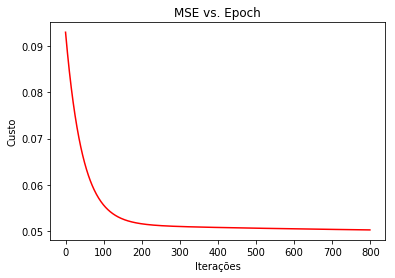

In [72]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), custo, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('MSE vs. Epoch')

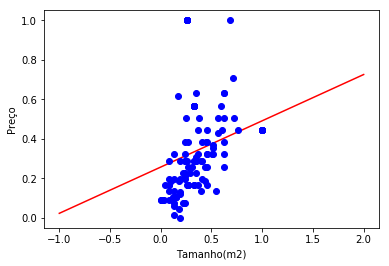

In [73]:
plot_line(X,y, w0, w1)

In [74]:
## Realizando uma previsão
hip(500, w0, w1)

117.28834905953296